# UFO Sighting Dataset

Looking for datasets to explore, I came across a dataset on Kaggle listing ### [UFO sightings over the last century](https://www.kaggle.com/NUFORC/ufo-sightings). Performed some basic cleaning, EDA and visualization on it. Here goes my attempt to present it!

# Data Cleaning 

Importing the basic stuff and creating the dataframe

In [128]:
import pandas as pd 
import numpy as np 
df = pd.read_csv(r"../data/complete.csv",error_bad_lines=False,warn_bad_lines=False,low_memory=False)


Let us take a look at the dataframe columns:

In [129]:
df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude'],
      dtype='object')

11 variables out of which all but latitutde and longitude are categorical and even lat/long do not have numerical significance 

Taking a look at 5 samples from the dataframe.

In [130]:
df.sample(5)

datetime           city state country     shape  \
43474  4/26/2014 21:00     santa cruz    ca      us     other   
70287   7/7/2005 21:45     fort worth    tx      us   unknown   
71469  8/11/2008 02:30  coral springs    fl      us   unknown   
32077  2/28/2004 20:30    studio city    ca      us  triangle   
83862  9/19/2009 21:55    minneapolis    mn      us     light   

      duration (seconds) duration (hours/min)  \
43474                300            5 minutes   
70287                120        a few minutes   
71469               7200              2 hours   
32077                300            5 minutes   
83862               1500               25 min   

                                                comments date posted  \
43474               Orange floating disappearing lights.    5/2/2014   
70287  fast moving object heading east and very high ...   7/13/2005   
71469  Something in the sky thats changing colors and...   8/12/2008   
32077  A triangular shaped object flies near the free...    3/2/2004   
83862      UFO - Viewed From Downtown Minneapolis&#44 MN  12/12/2009   

         latitude   longitude  
43474  36.9741667 -122.029722  
70287  32.7252778  -97.320556  
71469  26.2708333  -80.270833  
32077  34.1486111 -118.395556  
83862  44.9800000  -93.263611

All the columns are pretty simple to understand, let's remove the 'duration (hours/minutes) column - vague values(eg: 2 nights, 1-2 hours) and since seconds column has same info.

In [131]:
df.drop(labels='duration (hours/min)',axis=1,inplace=True)

Taking a count of null values:

In [132]:
#let's take a count
df.isnull().sum()

datetime                  0
city                      0
state                  7409
country               12365
shape                  2922
duration (seconds)        2
comments                 35
date posted               0
latitude                  0
longitude                 0
dtype: int64

**State** and **Country** have the maximum null values: 

Let us try to remove these by the following method: 
Let's first see the 'country' for the 'state' == 'tx'

In [133]:
df[df['state']=='tx']['country']


0         us
1        NaN
3         us
26        us
33        us
        ... 
88565     us
88576     us
88604     us
88631     us
88660     us
Name: country, Length: 4041, dtype: object

Let's check the number of null values here: 

In [134]:
df[df['state']=='tx']['country'].isnull().sum()

299

The mode here is very clearly 'us' but yet we have 299 null values. So we can replace the null values with 'us'.

Why not extend this principle and: 

**Iterate through each unique city and fill up empty country values** 

**Iterate through each city and fill up empty state values**

**Iterate through each state and fill up empty country values** 

Lets check number of unique cities 

In [135]:
df['city'].describe()
#there are ~22k unique cities and these can be used to fill many NaN country/state values 

count       88679
unique      22018
top       seattle
freq          570
Name: city, dtype: object

In [136]:
city_list=list(df['city'].unique()) #Creating a list of all unique cities:



## Let's define a function to perform the tasks mentioned above : 

   **Fill empty __ using __ , for example - fill empty countries using city.**

In [137]:
#let's define a function to perform the tasks mentioned above - fill empty __ using __ 


def fill_missing(fill_missing,fill_using): #both string values - eg: fill_missing = 'country', fill_using = 'city'
    unique_list = list(df[fill_using].unique()) #eg:list of unique cities
    for elem in unique_list: #for each city in list
        corresponding_missing_series = df[df[fill_using]==elem][fill_missing].mode() #eg: corresponding country in series form
        if len(corresponding_missing_series!=0): #if mode exists
            corresponding_missing = corresponding_missing_series.iloc[0]
            df.loc[df[fill_using]==elem,fill_missing] = df.loc[df[fill_using]==elem,fill_missing].fillna(corresponding_missing) #replace all empty
            
            

**Filling up empty countries using city:**

In [138]:
fill_missing('country','city')

**Since the function above might not be very clear in what it is doing - let us show what that task would look like without defining it as a function**

**Filling up empty countries using city:**

In [139]:
# #now iterating for each city 
# for city in city_list: # city list is a list of all unique cities
#     corresponding_country_series=df[df['city']==city]['country'].mode() #finding out the country which corresponds to that city
#     if len(corresponding_country_series!=0): #if a mode exists
#         corresponding_country=corresponding_country_series.iloc[0]
#         df.loc[df['city']==city,'country'] = df.loc[df['city']==city,'country'].fillna(corresponding_country) #replace all empty values with mode
        





Let's see how many null values we filled:

In [140]:
df['country'].isnull().sum()


11425

Managed to fill ~1k empty fields in country.

**Filling up empty states using city**

In [141]:
fill_missing('state','city')

**What the function actually did:**

In [142]:
# #we already have city_list
# for city in city_list:
#     corresponding_state_series=df[df['city']==city]['state'].mode() #finding out the state which corresponds to that city
#     if len(corresponding_state_series!=0):
#         corresponding_state=corresponding_state_series.iloc[0]
#         df.loc[df['city']==city,'state'] = df.loc[df['city']==city,'state'].fillna(corresponding_state)

Let's see how many empty states we filled up:

In [143]:
df['state'].isnull().sum()


7001

Only ~500 empty states filled.

Let's try to fill some more country fields by repeating the same code with states:

**Filling up empty country using states**

In [144]:
fill_missing('country','state')

Again, illustrating what our function did in the form of code just for clarity:

In [145]:
state_list=list(df['state'].unique())
#getting a list of all states

**Filling up empty country using states**

In [146]:
# #now iterating for each state
# for state in state_list:
#     corresponding_country_series=df[df['state']==state]['country'].mode() #finding out the country which corresponds to that city
#     if len(corresponding_country_series!=0):
#         corresponding_country=corresponding_country_series.iloc[0]
#         df.loc[df['state']==state,'country'] = df.loc[df['state']==state,'country'].fillna(corresponding_country)

In [147]:
df['country'].isnull().sum()


4381

7K null columns filled up in country!

Now checking empty df values:

In [148]:
 
df.isnull().sum()


datetime                 0
city                     0
state                 7001
country               4381
shape                 2922
duration (seconds)       2
comments                35
date posted              0
latitude                 0
longitude                0
dtype: int64

Let's remove rows with empty countries and empty states now.

In [149]:
df.dropna(subset=['country'],inplace=True)
df.dropna(subset=['state'],inplace=True)

In [150]:
df.isnull().sum()

datetime                 0
city                     0
state                    0
country                  0
shape                 2686
duration (seconds)       1
comments                34
date posted              0
latitude                 0
longitude                0
dtype: int64

Finally, we parse the **datetime** and **date_posted** columns to **datetime64** format.

In [151]:
df.dropna(subset=['duration (seconds)'],inplace=True) #dropping the one empty row remaining

In [152]:
#let's parse the datetime column into datetime64 format 
df['datetime'] = df['datetime'].str.replace("24:00","00:00") #there were columns with time as 24:00 - changing to 00:00
df['datetime_parsed'] = pd.to_datetime(df['datetime'],format ="%m/%d/%Y %H:%M" )

In [153]:
#similarly parsing date posted 
df['date_posted_parsed'] = pd.to_datetime(df['date posted'],infer_datetime_format=True)

Converting 'duration (seconds)' to float32 type:

In [154]:

df['duration (seconds)'] = df['duration (seconds)'].str.replace("`","") #lot of values had ` attached to them.
df['duration (seconds)'] = df['duration (seconds)'].astype(dtype='float32')


**Data cleaning done!**

# EDA:

# Framing a broad set of questions: 

**1. Which geographic regions (city/state/country-wise) have the maximum ufo sightings?**

**2. Is there any truth to the phrase that aliens only want invade the US(:P)?**

**3. How can you utilize the 'comments' column to get some/any meaningful insight?**

**4. Insights, if any from the shape of sightings?**


# Framing smaller chunks of questions

**1. Which city has the maximum ufo sightings?**

**2. Segregate the country according to the sightings count**

**3. Out of the cities where sightings have occured, where have the minimum sightings occured?(say for eg, only 1)**

**4. Show the cities with only higher volume of sightings (more than 50)**

**5. Out of the cities of sightings, how many are in the USA?**

**6. How many distinct shapes of UFO's have been sighted?**

**7. Most common shape of ufo sighted?** 

**8. Most unusual shape of ufo sighted?** 

**9. Average time duration for which ufo's are seen?**

**10. Group shapes by their mean duration**







xx----xx

**1. Which city has the maximum UFO sightings?**

Top 20 cities according to sightings frequency: 

(**Seattle** tops the list)

Interestingly all 20 are cities in the US. 

In [155]:
df['city'].value_counts()[:20]

seattle          570
phoenix          488
portland         399
las vegas        395
los angeles      375
san diego        361
houston          317
chicago          295
tucson           258
miami            258
orlando          237
austin           229
albuquerque      229
springfield      228
sacramento       216
columbus         213
san francisco    204
san jose         197
denver           197
san antonio      193
Name: city, dtype: int64

**2. Segregate the countries according to the sightings count**

Only 4 countries, however US does top the list. 

In [156]:
df['country'].value_counts()

us    77558
ca     3981
au       73
gb       64
Name: country, dtype: int64

**3. City with least volume of sightings - only 1**

Out of ~17k unique cities - ~10k have 1 sighting only i.e more than 50 percent.  

In [157]:
df_city_count = df['city'].value_counts().reset_index().rename(columns={'index':'city','city':'count'}) # df with count of cities 
df_city_count[df_city_count['count']==1][['city','count']]



city  count
7112   cranbury/east windsor      1
7113                 big bay      1
7114                     odd      1
7115                 hopland      1
7116               somerset?      1
...                      ...    ...
17888           lloyd harbor      1
17889                 toulon      1
17890      sandpoint (ne of)      1
17891      jackson/west bend      1
17892    mississippi (rural)      1

[10781 rows x 2 columns]

**4.Cities with a high volume (more than 50) sightings**

Only 225 cities have greater than 50 sightings i.e Less than 2 percent. 

In [158]:
df_city_count[df_city_count['count']>=50][['city','count']]

city  count
0        seattle    570
1        phoenix    488
2       portland    399
3      las vegas    395
4    los angeles    375
..           ...    ...
220    kennewick     50
221    wenatchee     50
222     syracuse     50
223     marietta     50
224         erie     50

[225 rows x 2 columns]

**5. Out of the cities of sightings, how many are in the USA?**

Out of ~17k, ~16k are in the US, overwhelming majority. 

In [159]:
df[df['country']=='us']['city'].value_counts()

seattle                                        570
phoenix                                        488
portland                                       399
las vegas                                      395
los angeles                                    375
                                              ... 
pasco (walla walla/franklin county line)         1
hillsbro                                         1
chihuahua mts (north of&#44 mexican border)      1
marin/san rafael                                 1
mojave (21 mi. nw of)                            1
Name: city, Length: 16564, dtype: int64

**6. How many distinct shapes of UFO's have been sighted?**

29! Not that many. 

In [160]:
df['shape'].describe()

count     78990
unique       29
top       light
freq      16556
Name: shape, dtype: object

**7. Most common shape of ufo sighted?** 

Light (?)

**8. Most unusual shape of ufo sighted?** 

Pyramid, Flare, Changed(?), Hexagon, Dome.


In [161]:
df['shape'].value_counts()

light        16556
triangle      7956
circle        7655
fireball      6126
unknown       5882
other         5703
disk          5427
sphere        5282
oval          3767
formation     2448
cigar         2044
changing      1980
flash         1367
rectangle     1310
cylinder      1283
diamond       1185
chevron        962
egg            746
teardrop       732
cone           321
cross          241
delta            8
round            2
crescent         2
hexagon          1
dome             1
changed          1
pyramid          1
flare            1
Name: shape, dtype: int64

**9. Average time duration for which ufo's are seen?**

**10. Group shapes by their mean duration**

US has almost all types of shapes sighted - red colour predominates the plot. 

Mean duration is less than 1000 minutes 

Canada has an overwhelmingly large mean value for 'other' shape of UFO - probably skewed by some large values. (if we remove largest duration value in canada for 'other'- 1380000 minutes - mean = 287 only]

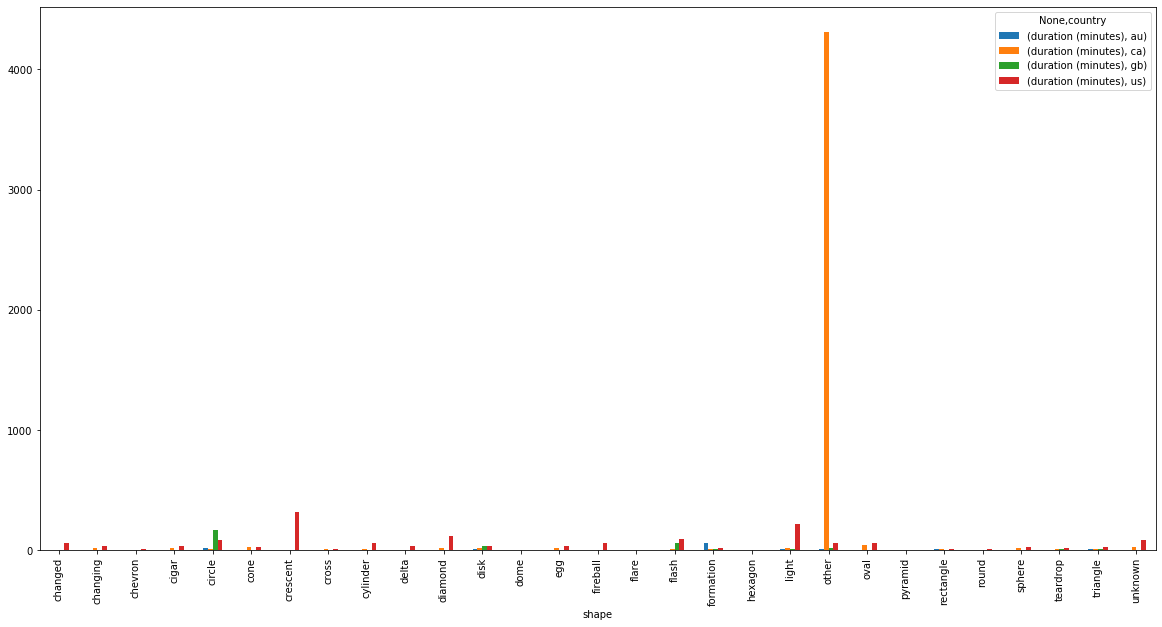

In [162]:
#plotting another column = converting seconds to minutes 
df['duration (minutes)'] = df['duration (seconds)']/60
#pivot table
pd.pivot_table(df,index=['shape'],columns=['country'],values=['duration (minutes)'],aggfunc='mean').plot.bar(figsize=(20, 10))

Without country-wise segregation: 

Crescent shaped UFO seen for highest mean duration and dome shaped UFO for least mean duration.

In [163]:
df[['shape','duration (minutes)']].groupby('shape').mean().sort_values(by='duration (minutes)', ascending = False)

duration (minutes)
shape                        
crescent           315.083344
other              299.817444
light              210.869003
diamond            111.433624
flash               85.636543
unknown             83.921013
circle              77.377106
oval                61.707512
fireball            60.275959
changed             60.000000
cylinder            56.450382
delta               33.656250
disk                32.963181
changing            32.560684
cigar               31.628613
egg                 31.190004
sphere              26.318829
cone                23.557581
triangle            21.986374
formation           20.414211
teardrop            15.165858
rectangle           10.980757
cross               10.897994
chevron              8.373873
round                7.541667
hexagon              4.000000
pyramid              2.000000
flare                0.500000
dome                 0.033333

# Visualization:

In [164]:
import plotly.express as px 
import plotly.graph_objects as go 

Let's see the distribution of **duration for which UFO's are sighted** in terms of a pie chart: 

Clearly, the time distribution is overwhelmingly in the US and Canada, with sightings for **extremely** small durations in Britain and Australia.

In [165]:
px.pie(df,names ='country',values='duration (minutes)',title='Duration(mean) of UFO sightings by country:')

Let's see if the distribution of **number of sightings** is also similar. 

As seen below, number of sightings is even more one sided- with 95 percent of all sightings in US. 

In [166]:
df_country_count = df['country'].value_counts().reset_index().rename(columns={'index':'country','country':'value'})
df_country_count

country  value
0      us  77558
1      ca   3981
2      au     73
3      gb     64

In [167]:
px.pie(df_country_count,names='country',values='value',title='Number of UFO sightings by country:')

**--XX--**

Let's visualize the top 10 cities in terms of the mean duration as a bar chart.

The text on top shows the country. Only one city in the top 20 is from Canada. 

In [168]:
df_mean_duration = df[['country','city','duration (minutes)']].groupby(['city','country']).mean().sort_values(by = 'duration (minutes)',ascending=False).reset_index()
px.bar(df_mean_duration[:20],x='city',y='duration (minutes)',text='country',title='Top 20 cities for duration(mean) of UFO sightings:')


Let's check out the mean duration separately for top 20 cities of other 3 countries to see how they compare: 

Starting off with **Canada**

In [169]:
df_ca=df[df['country']=='ca']
df_ca_mean_duration = df_ca[['city','duration (minutes)']].groupby(['city']).mean().sort_values(by = 'duration (minutes)',ascending=False).reset_index()
px.bar(df_ca_mean_duration[:20],x='city',y='duration (minutes)',text='duration (minutes)',title='Top 20 Canadian cities for duration(mean) of UFO sightings')


To **Australia**

In [170]:
df_au=df[df['country']=='au']
df_au_mean_duration = df_au[['city','duration (minutes)']].groupby(['city']).mean().sort_values(by = 'duration (minutes)',ascending=False).reset_index()
px.bar(df_au_mean_duration[:20],x='city',y='duration (minutes)',text = 'duration (minutes)',title='Top 20 Australian cities for duration(mean) of UFO sightings')


To **Great Britain**:

In [171]:
df_gb=df[df['country']=='gb']
df_gb_mean_duration = df_gb[['city','duration (minutes)']].groupby(['city']).mean().sort_values(by = 'duration (minutes)',ascending=False).reset_index()
px.bar(df_gb_mean_duration[:20],x='city',y='duration (minutes)',text = 'duration (minutes)',title='Top 20 British cities for duration(mean) of UFO sightings')


From the above 4 graphs, we can quickly figure out that - 

While **Great Britain** and **Canada** are on a similar scale for duration of sightings,

UFO's in **Canada** are sighted for around 100x more time duration compared to **Great Britain** and **Canada**.

Similarly, UFO's in **USA** are sighted for around 100x more time duration than in **Canada**!





**----XX-------**


Let's do a scatterplot of the shapes by country:

The **light** shape is the most popular shaped UFO sighted - more than **double** the number of sightings than the next most popular shape - **triangle**.

In [172]:
df_us_shape_count = df[df['country']=='us']['shape'].value_counts().reset_index().rename(columns={'index':'shape','shape':'count'}) #df of shapes according to count
px.scatter(df_us_shape_count,x='shape',y='count',title='Distribution of shapes of UFO in USA by number of sightings')

Let's see if the distribution of shapes is similar for other countries as well. 

**Canada**

In [173]:
df_ca_shape_count = df[df['country']=='ca']['shape'].value_counts().reset_index().rename(columns={'index':'shape','shape':'count'}) #df of shapes according to count
px.scatter(df_ca_shape_count,x='shape',y='count',title='Distribution of shapes of UFO in Canada by number of sightings')

**Australia**

In [174]:
df_au_shape_count = df[df['country']=='au']['shape'].value_counts().reset_index().rename(columns={'index':'shape','shape':'count'}) #df of shapes according to count
px.scatter(df_au_shape_count,x='shape',y='count',title='Distribution of shapes of UFO in Australia by number of sightings')

**Great Britain**

In [175]:
df_gb_shape_count = df[df['country']=='gb']['shape'].value_counts().reset_index().rename(columns={'index':'shape','shape':'count'}) #df of shapes according to count
px.scatter(df_gb_shape_count,x='shape',y='count',title='Distribution of shapes of UFO in Great Britain by number of sightings')

Looking at the above 4 plots, the difference in numbers is apparent. 


However, **'light'** remains the most commonly sighted shape in all 4 countries. 
In both **USA** and **Canada**, **light** is sighted more than **double** the number of times than the second most sighted shape. 

The difference is less is **Britain** and **Australia**, but the data is also less for these countries - can be expected to follow a similar trend if more data is given. 

In terms of common shapes - **light**, **circle** and **triangle** are the most commonly sighted shapes, again something that holds true for all countries. 

**---XX--**

**Choropleth for USA using the state codes given in the dataframe.**

In [176]:
df['state_upper'] = df['state'].str.upper() #converting state codes to upper case

In [190]:
df['latitude'] = df['latitude'].str.replace('q','')
df['latitude']=df['latitude'].astype('float64')

#converting columns to float 64 and removing any miscellaneous strings present in the numbers

datetime                      object
city                          object
state                         object
country                       object
shape                         object
duration (seconds)           float32
comments                      object
date posted                   object
latitude                     float64
longitude                    float64
datetime_parsed       datetime64[ns]
date_posted_parsed    datetime64[ns]
duration (minutes)           float32
state_upper                   object
dtype: object

In [192]:

df_duration=df[['state_upper','duration (minutes)','latitude','longitude']].groupby(['state_upper']).mean().sort_values(by = 'duration (minutes)',ascending=False).reset_index()


#dataframe for mean duration of ufo sightings per states

state_upper  duration (minutes)   latitude   longitude
0           AR         1525.402344  34.479604  -91.645499
1           ON          818.083618  43.870426  -78.212483
2           HI          570.910950  20.503922 -152.260732
3           TX          252.647141  30.735676  -96.292536
4           OK          236.723068  35.116506  -95.544679
..         ...                 ...        ...         ...
62          MD           12.951043  38.844149  -76.153534
63          NF           11.555914  41.479118  -50.692551
64          PQ            9.958252  44.576054  -71.304728
65          NB            9.826515  44.687151  -64.791043
66          PE            7.584783  42.323501  -59.957956

[67 rows x 4 columns]

In [193]:
px.choropleth(df_duration,color='duration (minutes)',locations='state_upper',locationmode='USA-states',color_continuous_scale='greens')

#no proper 

**Scatterplot on map showing distribution of duration of sightings!**

In [195]:
px.scatter_geo(df_duration,lat = 'latitude',lon='longitude',color='duration (minutes)')

--XX--
Only one numerical value on map so couldn't come up with correlations, etc.

In [ ]:
df